In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
import math
import scipy.optimize as opt

In [4]:
dat = pd.read_csv("hw2_fitting.dat", sep=" ", header=None)

In [31]:
def Gaussian(x, nu0, alpha_D):
    #Takes in x values of nu, and two fit parameters nu0 and alpha_D
    y = (1./alpha_D)*np.sqrt(np.log(2.)/np.pi)*np.exp((-np.log(2.)*(x - nu0)**2.)/(alpha_D**2.))
    return y

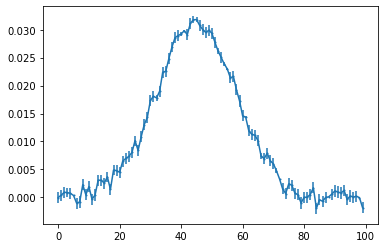

In [29]:
plt.scatter(dat[0],dat[1],s=1)
plt.errorbar(dat[0],dat[1],yerr=dat[2])

x = np.linspace(0,100,1000)
e = 2.718282
y = Gaussian(x,dat[0],)
#plt.plot(x,y)

In [32]:
def Lorentzian(x, nu0, alpha_L):
    #Takes in x values of nu, and two fit parameters nu0 and alpha_L
    y = (1./np.pi)*(alpha_L/((x - nu0)**2. + alpha_L**2.))
    return y

In [35]:
L_fit = opt.curve_fit(Lorentzian, dat[0], dat[1], sigma=dat[2], method='lm')

In [36]:
L_fit

(array([46.26902763,  7.54556472]),
 array([[ 0.06544782, -0.05440166],
        [-0.05440166,  0.10788385]]))

In [39]:
L_nu0, L_alpha = L_fit[0]

In [40]:
L_nu0_err, L_alpha_err = np.sqrt(np.diag(L_fit[1])) #Lorentzian fit errors for nu0 and alpha_L
print('Lorentzian fit using the scipy function: \n nu_0 = %s +/- %s$, \n alpha_L = %s +/- %s' % (L_nu0, L_nu0_err, L_alpha, L_alpha_err))

Lorentzian fit using the scipy function: 
 nu_0 = 46.269027631013486 +/- 0.25582770963648727$, 
 alpha_L = 7.545564716130859 +/- 0.32845677675361395


In [41]:
G_fit = opt.curve_fit(Gaussian, dat[0], dat[1], sigma=dat[2], method='lm') #Gaussian fit
G_nu0, G_alpha = G_fit[0] #Gaussian fit parameters for nu0 and alpha_L
G_nu0_err, G_alpha_err = np.sqrt(np.diag(G_fit[1])) #Gaussian fit errors for nu0 and alpha_D
print('Gaussian fit using the scipy function: \n nu_0 = %s +/- %s$, \n alpha_D = %s +/- %s' % (G_nu0, G_nu0_err, G_alpha, G_alpha_err))

Gaussian fit using the scipy function: 
 nu_0 = 44.95387087183405 +/- 0.0470986677989876$, 
 alpha_D = 15.026772514828137 +/- 0.0342364491045089


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 31
    # data points      = 50
    # variables        = 3
    chi-square         = 1.82237992
    reduced chi-square = 0.03877404
    Akaike info crit   = -159.593986
    Bayesian info crit = -153.857917
[[Variables]]
    a:  3.05000758 +/- 0.13972186 (4.58%) (init = 1)
    b:  2.12387107 +/- 0.17819564 (8.39%) (init = 1)
    c:  0.92712535 +/- 0.03793125 (4.09%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = 0.547
    C(a, b) = 0.493


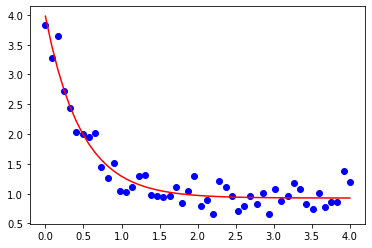

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, Parameter, report_fit

# Define the function to be optimized
def model(params, x):
    a = params['a'].value
    b = params['b'].value
    c = params['c'].value
    return a * np.exp(-b * x) + c

# Define the residual function to be minimized
def residuals(params, x, y):
    return y - model(params, x)

# Generate some sample data to fit
xdata = np.linspace(0, 4, 50)
ydata = 3.0 * np.exp(-2.0 * xdata) + 1.0 + 0.2 * np.random.normal(size=len(xdata))

# Set up the parameters for the optimization
params = Parameters()
params.add('a', value=1.0)
params.add('b', value=1.0)
params.add('c', value=1.0)

# Run the optimization using the Levenberg-Marquardt algorithm
result = minimize(residuals, params, args=(xdata, ydata), method='leastsq')

# Print the results
report_fit(result)

# Plot the data and the fitted function
plt.plot(xdata, ydata, 'bo')
plt.plot(xdata, model(result.params, xdata), 'r-')
plt.show()


In [43]:
!pip install lmfit

     |████████████████████████████████| 90 kB 4.4 MB/s eta 0:00:011
     |████████████████████████████████| 98 kB 19.2 MB/s eta 0:00:01


[3.03225791 2.23334839 1.06180414]


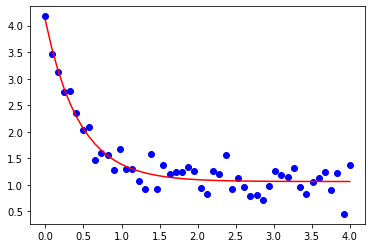

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

# Define the function to be optimized
def model(params, x):
    a, b, c = params
    return a * np.exp(-b * x) + c

# Define the residual function to be minimized
def residuals(params, x, y):
    return y - model(params, x)

# Generate some sample data to fit
xdata = np.linspace(0, 4, 50)
ydata = 3.0 * np.exp(-2.0 * xdata) + 1.0 + 0.2 * np.random.normal(size=len(xdata))

# Set up the initial guess for the parameters
params0 = [1.0, 1.0, 1.0]

# Run the optimization using the Levenberg-Marquardt algorithm
result = least_squares(residuals, params0, args=(xdata, ydata), method='lm')

# Print the results
print(result.x)

# Plot the data and the fitted function
plt.plot(xdata, ydata, 'bo')
plt.plot(xdata, model(result.x, xdata), 'r-')
plt.show()


In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to be optimized
def model(params, x):
    alpha_L, nu0= params
    y = (1./np.pi)*(alpha_L/((x - nu0)**2. + alpha_L**2.))
    return y

# Define the residual function to be minimized
def residuals(params, x, y):
    return y - model(params, x)

# Generate some sample data to fit
xdata = dat[0]
ydata = dat[1]

# Set up the initial guess for the parameters
params0 = [7.55, 46.27]

# Set up the Levenberg-Marquardt algorithm parameters
lamda = 0.001
max_iter = 100
tolerance = 1e-6

# Run the optimization using the Levenberg-Marquardt algorithm
params = params0
for i in range(max_iter):
    jacobian = np.array([
        np.exp(-params[1] * xdata),
        -params[0] * xdata * np.exp(-params[1] * xdata),
        np.ones(len(xdata))
    ]).T
    residuals_vector = residuals(params, xdata, ydata)
    grad = jacobian.T @ residuals_vector
    hessian = jacobian.T @ jacobian + lamda * np.diag(jacobian.T @ jacobian)
    delta = np.linalg.solve(hessian, grad)
    new_params = params + delta
    new_residuals = residuals(new_params, xdata, ydata)
    new_cost = np.sum(new_residuals ** 2)
    old_cost = np.sum(residuals_vector ** 2)
    if new_cost < old_cost:
        lamda /= 10
        params = new_params
        if np.abs(new_cost - old_cost) < tolerance:
            break
    else:
        lamda *= 10

# Print the results
print(params)

# Plot the data and the fitted function
plt.plot(xdata, ydata, 'bo')
plt.plot(xdata, model(params, xdata), 'r-')
plt.show()


ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to be optimized
def model(params, x):
    alpha_L, nu0= params
    y = (1./np.pi)*(alpha_L/((x - nu0)**2. + alpha_L**2.))
    return y

# Define the residual function to be minimized
def residuals(params, x, y):
    return y - model(params, x)

# Generate some sample data to fit
xdata = dat[0]
ydata = dat[1]

# Set up the initial guess for the parameters
params0 = [7.55, 46.27]

# Set up the Levenberg-Marquardt algorithm parameters
lamda = 0.001
max_iter = 100
tolerance = 1e-6

# Run the optimization using the Levenberg-Marquardt algorithm
params = params0
for i in range(max_iter):
    jacobian = np.array([
        np.exp(-params[1] * xdata),
        -params[0] * xdata * np.exp(-params[1] * xdata)
    ]).T
    residuals_vector = residuals(params, xdata, ydata)
    grad = jacobian.T @ residuals_vector
    hessian = jacobian.T @ jacobian + lamda * np.diag(jacobian.T @ jacobian)
    delta = np.linalg.solve(hessian, grad)
    new_params = params + delta
    new_residuals = residuals(new_params, xdata, ydata)
    new_cost = np.sum(new_residuals ** 2)
    old_cost = np.sum(residuals_vector ** 2)
    if new_cost < old_cost:
        lamda /= 10
        params = new_params
        if np.abs(new_cost - old_cost) < tolerance:
            break
    else:
        lamda *= 10

# Print the results
print(params)

# Plot the data and the fitted function
plt.plot(xdata, ydata, 'bo')
plt.plot(xdata, model(params, xdata), 'r-')
plt.show()


LinAlgError: Singular matrix

In [42]:
func = (1 / x) * sp.sqrt((sp.ln(2) / sp.pi)) * sp.exp((-sp.ln(2) * (y - z) ** 2) / x ** 2)

In [43]:
diff(func,x)

-exp(-(y - z)**2*log(2)/x**2)*sqrt(log(2))/(sqrt(pi)*x**2) + 2*(y - z)**2*exp(-(y - z)**2*log(2)/x**2)*log(2)**(3/2)/(sqrt(pi)*x**4)

In [44]:
lor = (1 / sp.pi) * (x) / ((y - z) ** 2 + (x) ** 2)
a = diff(lor, z)

In [45]:
a

x*(2*y - 2*z)/(pi*(x**2 + (y - z)**2)**2)

In [46]:
import scipy.linalg as lin

In [48]:
a = np.array([[1,2],[2,7]])
b = np.array([3,4])

lin.solve(a,b)

array([ 4.33333333, -0.66666667])